In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
import imageio
sns.set()

In [2]:
# path_cs = "/Users/iomacbookair2/Documents/lab/DEIM2023/word2vec/221213_ann_tue/cosine_similarity_w2v_221213_ann_tue.csv"
path_cs = "/Users/labimac/Documents/lab/DEIM2023/word2vec/221213_ann_tue/cosine_similarity_w2v_221213_ann_tue.csv"
df_cs = pd.read_csv((path_cs))
df_cs = df_cs.drop("texts_by_minute", axis=1)

# path_count = "/Users/iomacbookair2/Documents/lab/DEIM2023/count/count_221213_ann_tue.csv"
path_count = "/Users/labimac/Documents/lab/DEIM2023/count/count_221213_ann_tue.csv"
df_count = pd.read_csv((path_count))
df_cs["count"] = df_count["counts"]
df = df_cs
start_time = df['created_at'].min()
start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
df['created_at'] = df['created_at'].apply(lambda x: (
    datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - start_time).total_seconds() / 60)
df['created_at'] = df['created_at'].apply(lambda x: round(x))
# df['moving_average_tweet'] = df['count'].rolling(
#     window=3, min_periods=1).mean()
# df['moving_average_score'] = df['standard_deviation'].rolling(
#     window=3, min_periods=1).mean()
# df['devide'] = df['moving_average_score'] / df['moving_average_tweet']
# df.to_csv('cs_count_221213_ann_tue.csv', index=False)
df


,created_at,median,average,size,width,standard_deviation,count
0,0,1.000000,0.667899,20301,1.000000,0.466172,202
1,1,1.000000,0.341008,6903,1.000000,0.441836,118
2,2,0.444578,0.233005,1891,0.444578,0.288861,62
3,3,0.575540,0.344630,1891,0.575540,0.284260,62
4,4,0.619666,0.373188,2278,0.619666,0.293169,68
...,...,...,...,...,...,...,...
120,120,0.779716,0.524603,990,0.541426,0.318328,45
121,121,0.802628,0.544734,351,0.802628,0.341432,27
122,122,0.833680,0.762635,120,0.129990,0.108629,16
123,123,0.868218,0.637365,66,0.326630,0.310879,12


In [3]:
window_sizes = [1]


/var/folders/6z/_4s2jb6j5lg58zt24l9_xk440000gn/T/ipykernel_32329/1733931522.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave('animation.gif', [imageio.imread(png)


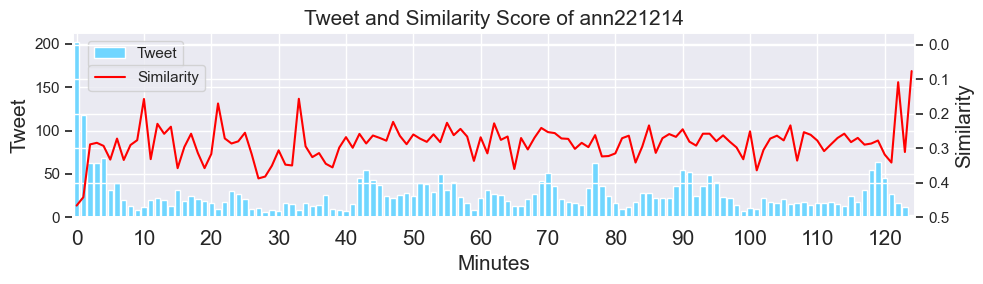

In [4]:
for window in window_sizes:
    df['moving_average_tweet'] = df['count'].rolling(
        window=window, min_periods=1).mean()
    df['moving_average_score'] = df['standard_deviation'].rolling(
        window=window, min_periods=1).mean()
    fig, ax = plt.subplots(figsize=(10, 3))
    # ax.set_title("Similarity Scores and Tweet Counts of ann221214, window size: {}".format(window))
    ax.set_title("Tweet and Similarity Score of ann221214", fontsize=15)
    indices = range(0, len(df), 10)
    plt.xticks(indices, df["created_at"][indices], fontsize=15)
    ax.set_xlim(-0.5, 124.5)
    ax.set_xlabel("Minutes", fontsize=15)
    ax.set_ylabel("Tweet", fontsize=15)
    ax.bar(df["created_at"], df["moving_average_tweet"],
           color="#70d6ff", label="Tweet")
    ax2 = ax.twinx()
    ax2.set_ylim(0.5, -0.033)
    ax2.set_ylabel("Similarity", fontsize=15)
    ax2.plot(df["created_at"], df["moving_average_score"], color="red",
             label="Similarity")
    ax.legend(loc="upper right", bbox_to_anchor=(0.14, 1))
    ax2.legend(loc="upper right", bbox_to_anchor=(0.166, 0.87))
    plt.tight_layout()
    plt.savefig('animation_{}.png'.format(window))

png_files = ['animation_{}.png'.format(window) for window in window_sizes]
imageio.mimsave('animation.gif', [imageio.imread(png)
                for png in png_files], duration=0.5)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/6z/_4s2jb6j5lg58zt24l9_xk440000gn/T/ipykernel_32329/1016080036.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave('animation_devide.gif', [imageio.imread(png)


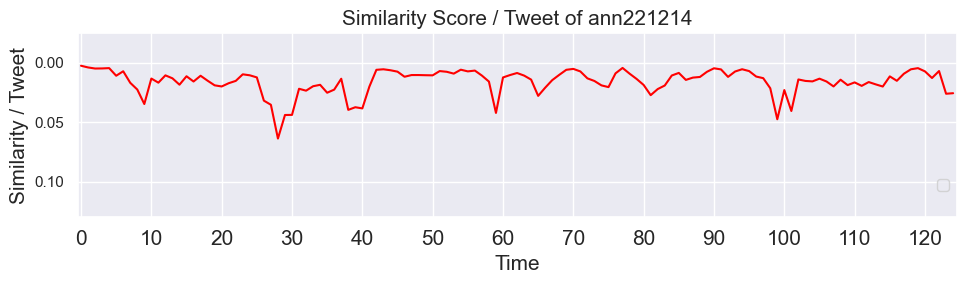

In [5]:
for window in window_sizes:
    df['moving_average_tweet'] = df['count'].rolling(
        window=window, min_periods=1).mean()
    df['moving_average_score'] = df['standard_deviation'].rolling(
        window=window, min_periods=1).mean()
    df['devide'] = df['moving_average_score'] / df['moving_average_tweet']
    fig, ax = plt.subplots(figsize=(10, 3))
    # ax.set_title("Similarity Score / Tweet of ann221214, window size: {}".format(window))
    ax.set_title("Similarity Score / Tweet of ann221214", fontsize=15)
    indices = range(0, len(df), 10)
    plt.xticks(indices, df["created_at"][indices], fontsize=15)
    ax.set_xlim(-0.5, 124.5)
    ax.set_ylim(0.13, -0.025)
    ax.plot(df["created_at"], df["devide"], color="red")
    ax.legend(loc="upper right", bbox_to_anchor=(1, 0.25))
    ax.set_xlabel("Time", fontsize=15)
    ax.set_ylabel("Similarity / Tweet", fontsize=15)
    plt.tight_layout()
    plt.savefig('animation_devide_{}.png'.format(window))

png_files = ['animation_devide_{}.png'.format(
    window) for window in window_sizes]
imageio.mimsave('animation_devide.gif', [imageio.imread(png)
                for png in png_files], duration=0.5)